# Manipulation Examples

In this notebook, you can select a trained MLP (for Borda) to manipulate using majority matrix information. 

In [2]:
%run ./model_functions.ipynb # import all functions from model_functions.ipynb to this notebook

In [3]:
print("Available models for Borda.")

for file in glob.glob(f"models/models*/Borda*.pickle"):
    print(file)

Available models for Borda.
models/models_('majority',)_uniform_optimize_1/Borda_1_4_5_uniform_('majority',)_1_12-18-2023_19-56-11.pickle
models/models_('majority',)_uniform_optimize_1/Borda_1_3_10_uniform_('majority',)_1_08-17-2023_09-21-29.pickle
models/models_('majority',)_uniform_optimize_1/Borda_1_5_10_uniform_('majority',)_1_01-10-2024_15-34-20.pickle
models/models_('majority',)_uniform_optimize_1/Borda_1_4_11_uniform_('majority',)_1_12-19-2023_11-22-27.pickle
models/models_('majority',)_uniform_optimize_1/Borda_1_3_6_uniform_('majority',)_1_12-12-2023_10-21-40.pickle
models/models_('majority',)_uniform_optimize_1/Borda_1_4_6_uniform_('majority',)_1_12-18-2023_19-56-11.pickle
models/models_('majority',)_uniform_optimize_1/Borda_1_3_5_uniform_('majority',)_1_12-12-2023_10-21-40.pickle
models/models_('majority',)_uniform_optimize_1/Borda_1_6_21_uniform_('majority',)_1_01-02-2024_22-51-37.pickle
models/models_('majority',)_uniform_optimize_1/Borda_1_3_21_uniform_('majority',)_1_12-1

Loading: models/models_('majority',)_uniform_optimize_1/Borda_1_3_5_uniform_('majority',)_1_12-12-2023_10-21-40.pickle


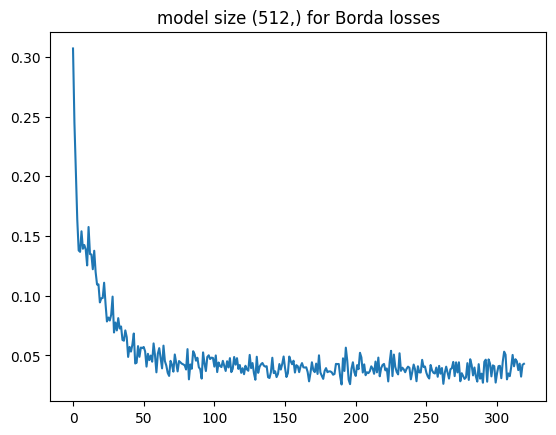

In [7]:

model_size = (512,)

# do not change the following parameters - due to the 50 MB limit, 
# only one family of models is included.
num_cands = 3
num_voters = 5
agent_infos = ('majority',)
vm = pref_voting.voting_methods.borda

probmodel = 'uniform'
labeling = 'optimize'
generation = 1
manip_weight = 1

agent = get_agent(model_size, num_cands, num_voters, agent_infos, vm, probmodel=probmodel, labeling=labeling, gen=generation, manip_weight=manip_weight)


Sincere profile
+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+
| 2 | 1 | 2 | 2 | 1 |
| 1 | 0 | 0 | 1 | 0 |
| 0 | 2 | 1 | 0 | 2 |
+---+---+---+---+---+
Borda winners are {1, 2}
Sincere ranking:  (2, 1, 0)
Submitted ranking:  (2, 0, 1)


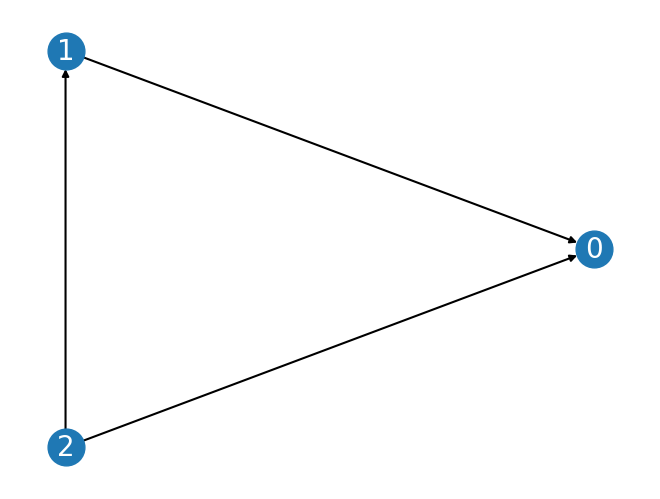

After the manipulation: 
Borda winner is {2}
Profitability:  0.28236085

Sincere profile
+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+
| 0 | 1 | 0 | 1 | 0 |
| 1 | 2 | 1 | 0 | 1 |
| 2 | 0 | 2 | 2 | 2 |
+---+---+---+---+---+
Borda winners are {0, 1}
Sincere ranking:  (0, 1, 2)
Submitted ranking:  (0, 2, 1)


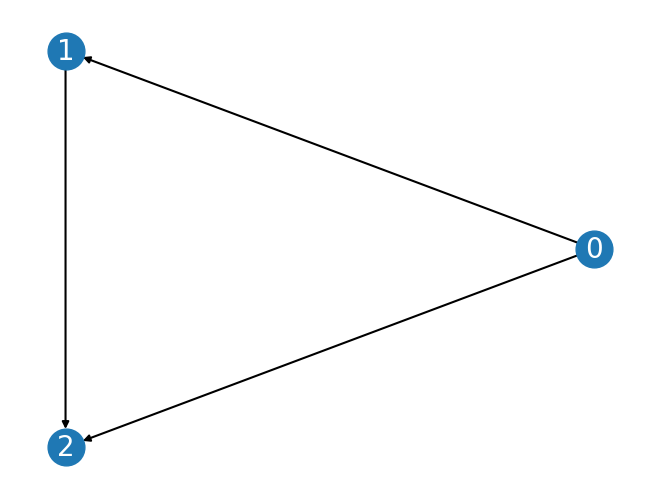

After the manipulation: 
Borda winner is {0}
Profitability:  0.4441422

Sincere profile
+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+
| 0 | 1 | 2 | 2 | 2 |
| 2 | 0 | 0 | 0 | 0 |
| 1 | 2 | 1 | 1 | 1 |
+---+---+---+---+---+
Borda winner is {2}
Sincere ranking:  (0, 2, 1)
Submitted ranking:  (0, 1, 2)


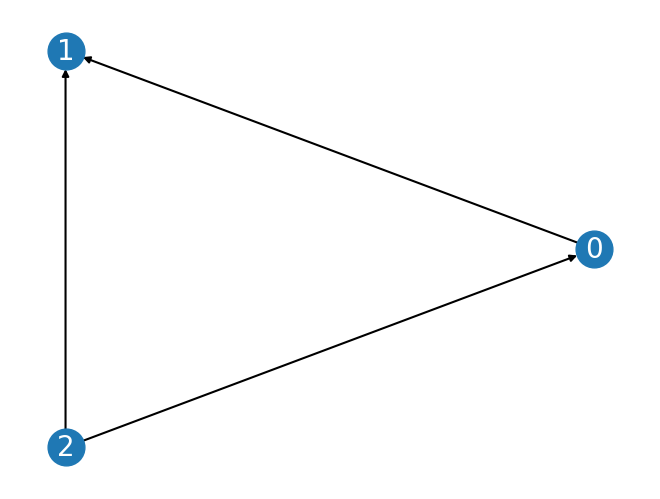

After the manipulation: 
Borda winners are {0, 2}
Profitability:  0.47310707

Sincere profile
+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+
| 1 | 0 | 1 | 0 | 2 |
| 0 | 2 | 2 | 1 | 0 |
| 2 | 1 | 0 | 2 | 1 |
+---+---+---+---+---+
Borda winner is {0}
Sincere ranking:  (1, 0, 2)
Submitted ranking:  (1, 2, 0)


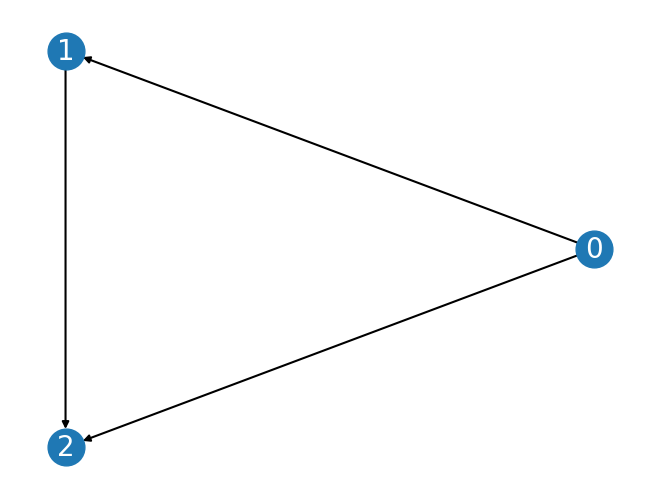

After the manipulation: 
Borda winners are {0, 1, 2}
Profitability:  0.32637736


Results
Percent of profiles that voter 0 submits a sincere ranking:
  0.3
Percent of profiles that voter 0 does not submit a sincere ranking:
  0.7
Of the manipulations, the percent that do not change the winning set:
 0.429
Of the manipulations that change the outcome, the percent that are profitable:
 1.0
Of the manipulations that change the outcome, the percent that are unprofitable:
 0.0


In [10]:

num_profiles = 10

# generate utility profiles
utility_profiles = generate_utility_profile(
    num_cands, 
    num_voters, 
    probmodel = probmodel, 
    num_profiles = num_profiles
)

# get the utility functions for voter 0 and the linear profiles associated with each utility profile
elections = (
    [uprof.utilities[0] for uprof in utility_profiles],
    [to_linear_prof(uprof) for uprof in utility_profiles],
)

# get the submitted ranking for each utility profile and the profitability of that submitted ranking.
evals, actions = get_profits_actions(
    agent, 
    len(elections), 
    vm, 
    num_cands, 
    num_voters, 
    manip_weight, 
    elections, 
    decision_rule='argmax', 
    metric_op="normalized_subtract", 
    agent_infos=agent_infos)

evals = evals.detach().cpu().numpy()
actions = actions.detach().cpu().numpy()

#print("actions", actions)
# display all profitable manipulations and record data about the actions of the manipulator
num_manipulations = 0
num_sincere_votes = 0
num_profitable_manipulations = 0
num_unprofitable_manipulations = 0

for u, prof, profit, act in zip(elections[0], elections[1], evals, actions):
    sincere_ranking = prof.rankings[0]
    submitted_ranking = permutations_of[num_cands][act]
    if sincere_ranking != submitted_ranking: 
        num_manipulations += 1
        new_prof = apply_manipulation(prof, submitted_ranking, manip_weight=1)
        if profit > 0: 
            num_profitable_manipulations += 1
            print("Sincere profile")
            prof.display()
            vm.display(prof)
            print("Sincere ranking: ", sincere_ranking)
            print("Submitted ranking: ", submitted_ranking)
            prof.majority_graph().display() 
            print("After the manipulation: ")
            vm.display(new_prof)
            print("Profitability: ", profit)
            print()

        elif profit < 0: 
            num_unprofitable_manipulations += 1
    else: 
        num_sincere_votes += 1

print()
print("Results")
print("Percent of profiles that voter 0 submits a sincere ranking:\n ", round(num_sincere_votes / num_profiles, 3))
print("Percent of profiles that voter 0 does not submit a sincere ranking:\n ", round(num_manipulations / num_profiles, 3))
print("Of the manipulations, the percent that do not change the winning set:\n", round((num_manipulations - (num_profitable_manipulations + num_unprofitable_manipulations)) / num_manipulations, 3))

print("Of the manipulations that change the outcome, the percent that are profitable:\n", round(num_profitable_manipulations / (num_profitable_manipulations + num_unprofitable_manipulations), 3))
print("Of the manipulations that change the outcome, the percent that are unprofitable:\n", round(num_unprofitable_manipulations / (num_profitable_manipulations + num_unprofitable_manipulations), 3))
